# Wstęp do Sztucznej Inteligencji - rok akademicki 2018/2019

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `{NrAlbumu}_{Nazwisko}_{Imie}_{PoprzedniaNazwa}`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia, w szczególności, że uzupełniłeś wszystkie pola `YOUR CODE HERE` oraz `YOUR ANSWER HERE`.

## Temat: Wnioskowanie oparte na wiedzy niepewnej. Wnioskowanie rozmyte
Zapoznaj się z treścią niniejszego notatnika czytając i wykonując go komórka po komórce. Wykonaj napotkane zadania/ćwiczenia.

### Uwaga:
Osoby nie korzystające z obrazu dockera, muszą doinstalować moduł [fuzzython](https://github.com/yudivian/fuzzython) o ile już tego nie zrobiły. Orginalny moduł zawierał kilka błędów przez co nie dało się go zainstalować za pomocą `pip`. Aby go zainstalować należy pobrać zmodyfikowany moduł `fuzzython.zip` (plik dostępny na elf'ie), rozpakować go do folderu `site-packages` (w przypadku używania Anacondy: PATH\Anaconda3\venvs\wdsienv\Lib\site-packages), następnie w terminalu ustawić sie w tym folderze i wykonać komendę:
```bash
python setup.py install
```
Należy upewnić się że instalujemy do paython'a z odpowiedniej dystrybucji jeśli mamy ich więcej.

Przy importowaniu elementów z modułu `fuzzython` używamy konstrukcji:
```python
from fuzzython.nazwa_podmodulu import jakies, funkcje, klasy, itp.
```

### Zbiory rozmyte
Zbiory rozmyte pozwalają w sposób usystematyzowany modelować pojęcia nieprecyzyjne, jakimi ludzie posługują się na co dzień. Przykładem może być wyrażenie `wysoka temperatura`, `duża prędkość` czy `młody człowiek`. Również podczas rozumowania i podejmowania decyzji, ludzie wykorzystują takie rozmyte pojęcia. Rozumujemy na przykład: 
```
Jeśli droga jest bardzo kręta i widoczność jest bardzo słaba, należy jechać bardzo powoli.
```

#### Podstawowe pojęcia
__Def. 1.__ _Zbiorem rozmytym $A$_ w niepustej przestrzeni $X$ nazywamy zbiór par:

$$ A = \{(x, \mu_A(x))\colon x \in X\},$$

gdzie funkcja $\mu_A(x)\colon X \to [0, 1]$ jest _funkcją przynależności zbioru rozmytego $A$_.

Funkcja $\mu_A$ każdemu elementowi $x \in X$ przypisuje jego _stopień przynależności_ do zbioru rozmytego $A$.

__Def. 2.__ Zbiór elementów przestrzeni $X$, dla których $\mu_A(x)>0$ nazywamy _nośnikiem_ zbioru
rozmytego $A$ i oznaczamy:

$$ supp(A) = \{x \in X \colon \mu_A(x) > 0\}.$$

__Def. 3.__ _Wysokość_ zbioru rozmytego $A$ określamy jako:

$$ height(A) = \sup\limits_{x\in X}\{\mu_A(x)\}.$$

#### Podstawowe operacje na zbiorach rozmytych
__Def. 4.__ _Dopełnieniem (negacją)_ zbioru rozmytego $A \subseteq X$ nazywamy zbiór rozmyty $\neg A$ opisany funkcją przynależności:

$$\mu_{\neg A}(x) = 1 − \mu_A(x), \quad \forall x \in X.$$

__Def. 5.__ _Sumą_ zbiorów rozmytych $A, B \subseteq X$ jest zbiór rozmyty $A \cup B$ o funkcji przynależności opisanej najczęściej wzorem:

$$\mu_{A\cup B}(x) = \max\{\mu_A(x), \mu_B(x)\},\quad \forall x \in X.$$

__Def. 6.__ _Przecięciem_ zbiorów rozmytych $A, B \subseteq X$ jest zbiór rozmyty $A \cap B$ o funkcji przynależności opisanej najczęściej wzorem:

$$ \mu_{A\cap B}(x) = \min\{\mu_A(x), \mu_B(x)\},\quad \forall x \in X.$$

Operacje sumy, przecięcia i dopełnienia zbiorów rozmytych można zdefiniować ogólniej w postaci:

$$\mu_{A\cup B}(x) = S(\mu_A(x), \mu_B(x)),\quad \forall x \in X,$$

$$ \mu_{A\cap B}(x) = T(\mu_A(x), \mu_B(x)),\quad \forall x \in X,$$

$$\mu_{\neg A}(x) = C(\mu_A(x)), \quad \forall x \in X.$$

gdzie funkcje $S$, $T$ i $C$ są odpowiednio $S$-normą, $T$-normą i $C$-normą.

#### Typy zbiorów rozmytych dostępne w module `fuzzython`
Obiekty zbiorów rozmytych dostępne są w podmodule `fsets`, niestety każdy typ zdefiniowany jest w osobnym pliku dlatego trzeba importować każdy z osobna. Moduł `fuzzython` nie jest oficjalnym pakietem i niestety zawiera sporo błędów i nie wszystko działa poprawnie. Ograniczymy się więc do następujących funkcji przynależności:

- singleton
- triangular
- trapezoid
- gaussian
- sfunction
- zfunction

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# pomocnicza funkcja do rysowania zbiorów rozmytych
def plot_fuzzyset(ax, fuzzy_set, x, *args, **kwargs):
    y = np.array([fuzzy_set(e) for e in x])
    ax.plot(x, y,  *args, **kwargs)
    ax.set_ylim(-0.1, 1.1)
    ax.legend()

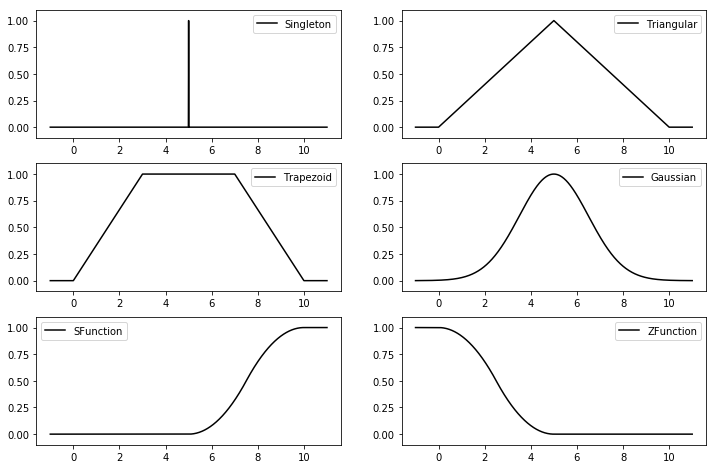

In [2]:
from fuzzython.fsets.singleton import Singleton
from fuzzython.fsets.triangular import Triangular
from fuzzython.fsets.trapezoid import Trapezoid
from fuzzython.fsets.gaussian import Gaussian
from fuzzython.fsets.pifunction import PiFunction
from fuzzython.fsets.zfunction import ZFunction
from fuzzython.fsets.sfunction import SFunction

A = Singleton(5.0)
# zbiór rozmyty o trójkątnej funkcji przynależności (podajemy współrzędne wierzchołków)
B = Triangular((0,0), (5,1), (10,0))
# zbiór rozmyty o trapezoidalnej funkcji przynależności (podajemy współrzędne wierzchołków)
C = Trapezoid((0,0), (3,1), (7,1), (10,0))
# zbiór rozmyty o gaussowskiej funkcji przynależności (podajemy mean i std)
D = Gaussian(5, 1.5)
# zbiór rozmyty o funkcji przynależności typu S (podajemy punkt dla 0, punkt przegięcia i punkt dla 1)
E = SFunction((5,0), 7.5, (10,1))
# zbiór rozmyty o funkcji przynależności typu Z (podajemy punkt dla 1, punkt przegięcia i punkt dla 0)
# w module jest błąd i trzeba podać odwrotnie drugie współrzędne
F = ZFunction((0,0), 2.5, (5,1))

# wykresy poglądowe
x = np.round(np.linspace(-1,11,2000),2)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12,8))
((ax1, ax2), (ax3, ax4), (ax5, ax6)) = axs
plot_fuzzyset(ax1, A, x, 'k', label='Singleton')
plot_fuzzyset(ax2, B, x, 'k', label='Triangular')
plot_fuzzyset(ax3, C, x, 'k', label='Trapezoid')
plot_fuzzyset(ax4, D, x, 'k', label='Gaussian')
plot_fuzzyset(ax5, E, x, 'k', label='SFunction')
plot_fuzzyset(ax6, F, x, 'k', label='ZFunction')
plt.show()

#### S-normy, T-normy i C-normy dostępne w module `fuzzython`
Obiekt zbioru rozmytego posiada metody `union`, `intersect` oraz `complement`, które zależą od przyjętych norm dla operacji odpowiednio sumy, przecięcia i dopełnienia. Różne definicje operacji sumy ($S$-normy), przecięcia ($T$-normy) i dopełnienia ($C$-normy) dostępne są w podmodule `norms`.

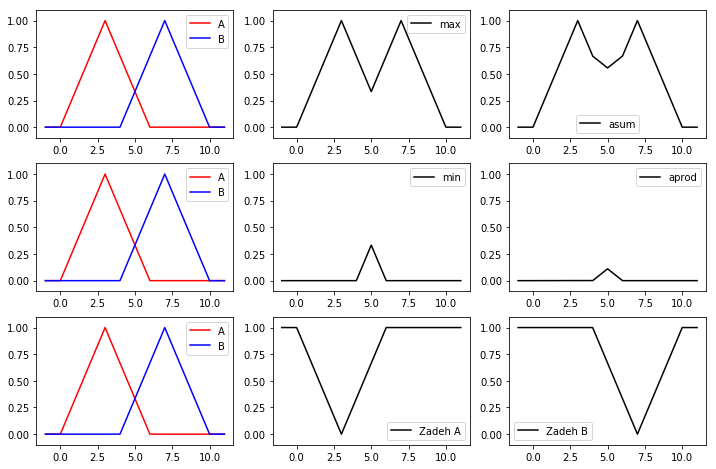

In [3]:
from fuzzython.norms import norms

A = Triangular((0,0), (3,1), (6,0))
B = Triangular((4,0), (7,1), (10,0))
C = A.union(B, snorm=norms.maximum)
D = A.union(B, snorm=norms.algebraic_sum)
E = A.intersect(B, tnorm=norms.minimum)
F = A.intersect(B, tnorm=norms.algebraic_product)
G = A.complement(cnorm=norms.zadeh_complement)
H = B.complement(cnorm=norms.zadeh_complement)

# wykresy poglądowe
x = np.linspace(-1,11,1000)
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12,8))
((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = axs
plot_fuzzyset(ax1, A, x, 'r', label='A')
plot_fuzzyset(ax1, B, x, 'b', label='B')
plot_fuzzyset(ax2, C, x, 'k', label='max')
plot_fuzzyset(ax3, D, x, 'k', label='asum')
plot_fuzzyset(ax4, A, x, 'r', label='A')
plot_fuzzyset(ax4, B, x, 'b', label='B')
plot_fuzzyset(ax5, E, x, 'k', label='min')
plot_fuzzyset(ax6, F, x, 'k', label='aprod')
plot_fuzzyset(ax7, A, x, 'r', label='A')
plot_fuzzyset(ax7, B, x, 'b', label='B')
plot_fuzzyset(ax8, G, x, 'k', label='Zadeh A')
plot_fuzzyset(ax9, H, x, 'k', label='Zadeh B')
plt.show()

### Wnioskowanie rozmyte
#### Wiadomości wstępne
W klasycznej logice operujemy na zdaniach logicznych, które mogą być prawdziwe lub fałszywe i nie przyjmują stanów pośrednich. Jedną z reguł wnioskowania klasycznej logiki jest reguła _modus ponens_:

$$ \frac{A, A \to B}{B}$$

Z prawdziwości implikacji wiadomo, że zawsze ilekroć zachodzi $A$ ($A$ przyjmuje wartość „prawda”) to zachodzi również $B$. Skoro więc w pewnej konkretnej sytuacji zachodzi $A$, to możemy być pewni ze zachodzi również $B$.

W logice rozmytej zamiast zdaniami, przyjmującymi wartość prawda lub fałsz, posługujemy się zmiennymi lingwistycznymi, które przyjmują jako wartości nieprecyzyjne (wartości lingwistyczne) pojęcia języka mówionego, takie jak „mały”, „średni”, „duży”. Przykładowo, „temperatura” może być zmienną lingwistyczna i przyjmować wartości nieprecyzyjne „mała”, średnia”, „wysoka”. Te nieprecyzyjne pojęcia, jak wiadomo, można modelować za pomocą odpowiednich zbiorów rozmytych.

Zbiór reguł wnioskowania rozmytego przyjmuje postać:

$$ \textbf{Jeśli } x_1 \text{ jest } A_1^1 \text{ i } x_2 \text{ jest } A_2^1 \text{ i } \ldots \text{ i } x_n \text{ jest } A_n^1 \textbf{ to } y \text{ jest } B^1$$

$$ \ldots $$

$$ \textbf{Jeśli } x_1 \text{ jest } A_1^M \text{ i } x_2 \text{ jest } A_2^M \text{ i } \ldots \text{ i } x_n \text{ jest } A_n^M \textbf{ to } y \text{ jest } B^M$$

$x_i$ oraz $y$ to zmienne lingwistyczne, $A_j^i$ oraz $B^i$ to wartości tych zmiennych lingwistycznych określone przez odpowiednie zbiory rozmyte. Górny indeks oznacza numer reguły, dolny numer zmiennej lingwistycznej. Rodzaj funkcji określającej funkcje przynależności danego zbioru rozmytego jak również jej współczynniki, mają duży wpływ na działanie modelu.

Odpowiednikiem rozumowania _modus ponens_ w logice rozmytej będzie następująca reguła:

$$\frac{x \text{ jest } A', A \to B}{y \text{ jest } B'}$$

W tym przypadku $x$ i $y$ to zmienne lingwistyczne a $A$, $A'$, $B$, $B'$ to zbiory rozmyte. Najważniejszą rzeczą, którą warto zauważyć w powyższej regule to fakt, że zbiór $A'$ występujący w przesłance wcale nie jest identyczny ze zbiorem rozmytym $A$ występującym w rozmytej implikacji. Podobnie zbiór $B'$ nie jest równy zbiorowi $B$. Pozwala to na pewną elastyczność. Jeśli bowiem zbiór $A'$ określa podobną sytuację jak zbiór $A$, to możemy się spodziewać, że zbiór $B'$ powinien być zbliżony znaczeniowo (lingwistycznie) do zbioru $B$.

Ilustruje to następujący przykład:

Mamy regułę rozmytą:
```
Jeśli prędkość samochodu jest bardzo duża, to poziom hałasu jest wysoki.
```

Przesłanka mówi natomiast:
```
Prędkość samochodu jest duża.
```

Widać zatem, że wartość lingwistyczna „bardzo duża” nie jest tożsama z wartością „duża”. Jednak z ich podobieństwa wynika, że powinniśmy oczekiwać podobnego wniosku jak w regule, przykładowo:
```
Poziom hałasu jest średnio wysoki.
```

Skoro więc ludzie posługując się nieprecyzyjnymi pojęciami i regułami rozmytymi, potrafią radzić sobie z szeregiem skomplikowanych zadań, istnieje praktyczna potrzeba symulowania takiego rodzaju rozumowania. W ten sposób powstały sterowniki rozmyte.

#### Realizacja rozmytej implikacji
Reguła rozmyta typu $(A \to B)$, gdzie $A$ oraz $B$ są zbiorami rozmytymi, to rozmyta implikacja i może być zrealizowana na wiele sposobów. Dwa z popularnych sposobów jej realizacji to reguła minimum oraz iloczynu.

Jeśli zbiory $A$ i $B$ mają funkcje przynależności odpowiednio $\mu_A(x)$ oraz $\mu_B(y)$ to rozmyta implikacja $(A \to B)$ jest zbiorem rozmytym o funkcji przynależności określonej przez jedną z reguł, przykładowo:

1. reguła typu minimum: $\mu_{A\to B}(x, y) = \min\{\mu_A(x), \mu_B(y)\}$,

2. reguła typu iloczyn: $\mu_{A\to B}(x, y) = \mu_A(x)\cdot\mu_B(y)$.

#### Realizacja rozmytego wnioskowania
W logice rozmytej wnioskowanie realizuje się przez złożenie rozmytego zbioru $A'$ oraz rozmytej implikacji $(A\to B)$. W wyniku złożenia otrzymamy zbiór rozmyty $B'$, który stanowi wniosek.

$$B' = A'\circ(A \to B).$$

Złożenie to realizowane jest następująco:

$$ \mu_{B'}(y) = \sup\limits_{x\in X}\{T(\mu_{A'}(x), \mu_{A\to B}(x, y))\},$$

gdzie $T$ oznacza pewna $T$-normę. Jeśli przykładowo $T$-norma jest typu $\min$, otrzymuje się:

$$\mu_{B'}(y) = \sup\limits_{x\in X}\{\min\{\mu_{A'}(x), \mu_{A\to B}(x, y)\}\}.$$

#### Klasyczny sterownik rozmyty
Klasyczny sterownik rozmyty składa się z trzech części:

1. Bloku rozmywania (fuzyfikacji).

2. Bloku wnioskowania (inferencji) wraz z baza reguł.

3. Bloku wyostrzania.

#### Rodzaje modeli rozmytych
Najbardziej popularnymi rodzajami modeli rozmytych są:

__Model Mamdaniego__, gdzie reguły rozmyte maja postać:

$$ \textbf{Jeśli } x \text{ jest } A \textbf{ to } y \text{ jest } B,$$

gdzie $A$ i $B$ to zbiory rozmyte.

__Model Takagi–Sugeno__, gdzie reguły rozmyte maja postać:

$$ \textbf{Jeśli } x \text{ jest } A \textbf{ to } y=f(x),$$

gdzie tylko $A$ jest zbiorem rozmytym, natomiast $y$ jest określany za pomocą pewnej funkcji $f$.

#### Operatory wyostrzania dostępne w module `fuzzython`
Operatory wyostrzania to odwzorowania, które zbiorowi rozmytemu przyporządkowują pewną liczbę ostrą (liczbę rzeczywistą).

W module `fuzzython` każdy obiekt zbioru rozmytego wyposażony jest w metody wyostrzania takie jak:

- `COG` - środek ciężkości (center of gravity)
- `COA` - środek obszaru (center of area)
- `CM` - środek maksimów (center of maximum)
- `MM` - średnia z maksimów (mean of maximum)
- `LM` - lewe (pierwsze) maksimum (left maximum)
- `RM` - prawe (ostatnie) maksimum (right maximum)

__Uwaga:__ Dla bezpieczeństwa (z powodu pojawiających się błędów) lepiej korzystać z operatorów wyostrzania zdefiniowanych w klasie nadrzędnej `FuzzySet`, jak poniżej w przykładzie.

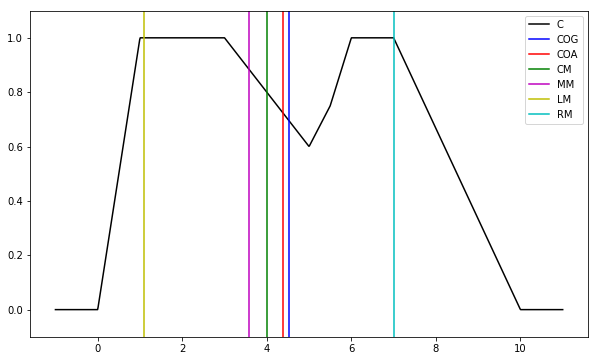

In [4]:
from fuzzython.fsets.fuzzy_set import FuzzySet

A = Trapezoid((0,0), (1,1), (3,1), (8,0))
B = Trapezoid((5,0), (6,1), (7,1), (10,0))
C = A.union(B, snorm=norms.algebraic_sum)

cog = FuzzySet.COG(C)
coa = FuzzySet.COA(C)
cm = FuzzySet.CM(C)
mm = FuzzySet.MM(C)
lm = FuzzySet.LM(C)
rm = FuzzySet.RM(C)

# wykresy poglądowe
x = np.linspace(-1,11,1000)
fig, ax = plt.subplots(figsize=(10,6))
plot_fuzzyset(ax, C, x, 'k', label='C')
ax.axvline(x=cog, c='b', label='COG')
ax.axvline(x=coa, c='r', label='COA')
ax.axvline(x=cm, c='g', label='CM')
ax.axvline(x=mm, c='m', label='MM')
ax.axvline(x=lm, c='y', label='LM')
ax.axvline(x=rm, c='c', label='RM')
plt.legend()
plt.show()

### Przykład: Model Mamdaniego: Decydujemy o wysokości napiwku
#### Definiowanie zmiennych lingwistycznych

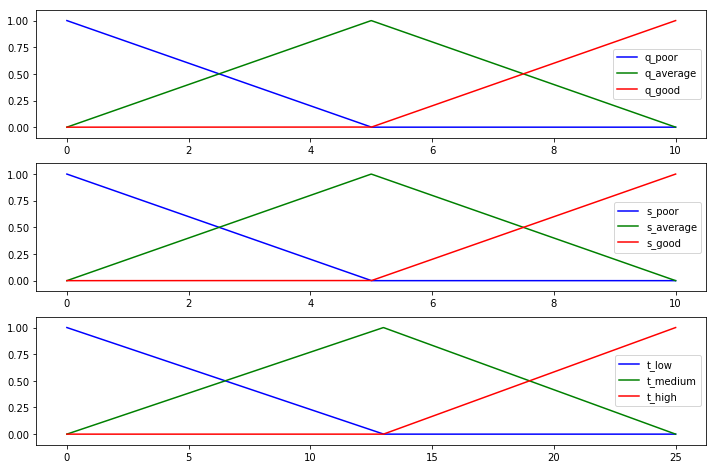

In [5]:
# prosty przykład z użyciem trójkątnych zbiorów rozmytych
from fuzzython.fsets.triangular import Triangular
# klasa Variable - zmienna lingwistyczna
from fuzzython.variable import Variable
# klasa Adjective - wartość zmiennej lingwistycznej
from fuzzython.adjective import Adjective

# zmienna lingwistyczna `quality` opisująca jakość jedenia w skali od 0 do 10 gwiazdek (star)
# trzy wartości lingwistyczne, trójkątne zbiory rozmyte: `q_poor`, `q_average`, `q_good`

q_poor = Triangular((-0.1,0), (0,1), (5,0))
q_average = Triangular((0,0), (5,1), (10,0))
q_good = Triangular((5,0), (10,1), (10.1,0))
a_q_poor = Adjective('q_poor', q_poor)
a_q_average = Adjective('q_average', q_average)
a_q_good = Adjective('q_good', q_good)
quality = Variable('quality', 'star', a_q_poor, a_q_average, a_q_good)

# zmienna lingwistyczna `service` opisująca jakość obsługi w skali od 0 do 10 gwiazdek (star)
# trzy wartości lingwistyczne, trójkątne zbiory rozmyte: `s_poor`, `s_average`, `s_good`

s_poor = Triangular((-0.1,0), (0,1), (5,0))
s_average = Triangular((0,0), (5,1), (10,0))
s_good = Triangular((5,0), (10,1), (10.1,0))
a_s_poor = Adjective('s_poor', s_poor)
a_s_average = Adjective('s_average', s_average)
a_s_good = Adjective('s_good', s_good)
service = Variable('service', 'star', a_s_poor, a_s_average, a_s_good)

# zmienna lingwistyczna `tip` opisująca jwysokość napiwku w skali od 0 do 25 procent (%)
# trzy wartości lingwistyczne, trójkątne zbiory rozmyte: `t_low`, `t_medium`, `t_high`

t_low = Triangular((-0.1,0), (0,1), (13,0))
t_medium = Triangular((0,0), (13,1), (25,0))
t_high = Triangular((13,0), (25,1), (25.1,0))
a_t_low = Adjective('t_low', t_low)
a_t_medium = Adjective('t_medium', t_medium)
a_t_high = Adjective('t_high', t_high)
tip = Variable('tip', '%', a_t_low, a_t_medium, a_t_high, defuzzification='COG', default=0)

# wykresy poglądowe
x = np.linspace(0,10,1000)
x2 = np.linspace(0,25,1000)
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12,8))
((ax1), (ax2), (ax3)) = axs
plot_fuzzyset(ax1, q_poor, x, 'b', label='q_poor')
plot_fuzzyset(ax1, q_average, x, 'g', label='q_average')
plot_fuzzyset(ax1, q_good, x, 'r', label='q_good')
plot_fuzzyset(ax2, s_poor, x, 'b', label='s_poor')
plot_fuzzyset(ax2, s_average, x, 'g', label='s_average')
plot_fuzzyset(ax2, s_good, x, 'r', label='s_good')
plot_fuzzyset(ax3, t_low, x2, 'b', label='t_low')
plot_fuzzyset(ax3, t_medium, x2, 'g', label='t_medium')
plot_fuzzyset(ax3, t_high, x2, 'r', label='t_high')
plt.show()

#### Definiowanie reguł
__Uwaga:__ Parser przetwarzający reguły w module fuzzython jest zrealizowany w bardzo prosty sposób, dlatego nazwy zmiennych nie mogą zawierać słów kluczowych takich jak: `if`, `is`, `then`.

In [6]:
from fuzzython.ruleblock import RuleBlock

scope = locals()

rule1 = 'if quality is a_q_poor or service is a_s_poor then tip is a_t_low'
rule2 = 'if quality is a_q_average then tip is a_t_medium'
rule3 = 'if quality is a_q_good or service is a_s_good then tip is a_t_high'

# operators - operatory dla przecięcia, sumy i dopełnienia zbiorów rozmytych
# activation - operator dla implikacji
# accumulation - aperator dla agregacji reguł
block = RuleBlock('rb_mamdani', operators=('MIN','MAX','ZADEH'), activation='MIN', accumulation='MAX')
block.add_rules(rule1, rule2, rule3, scope=scope)

#### Stworzenie sterownika rozmytego typu Mamdani 

In [7]:
from fuzzython.systems.mamdani import MamdaniSystem

mamdani = MamdaniSystem('mamdani_model', block)

#### Wnioskowanie z użyciem modelu Mamdani

In [8]:
# dane wejściowe
inputs = {'quality': 6, 'service': 9} #tak naprawdę to można podać liczby rzeczywiste od 0 do 10
# obliczenie odpowiedzi
res = mamdani.compute(inputs)
#zwraca słownik
res

{'rb_mamdani': {'tip': 14.60428957320322}}

#### Wykres powierzchni decyzyjnej

<IPython.core.display.Javascript object>


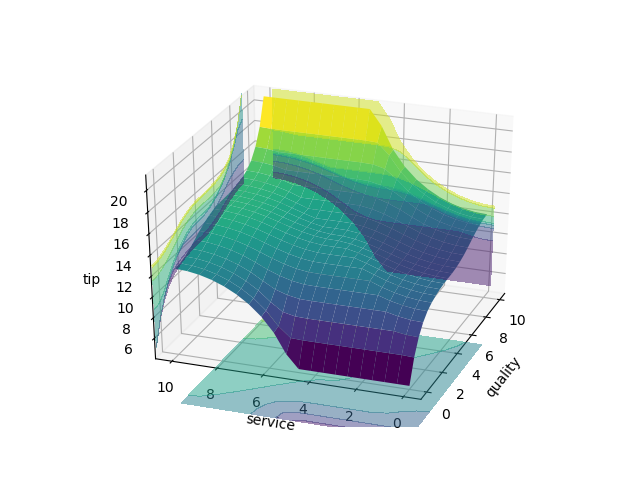

In [9]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

# przygotowanie siatki
sampled = np.linspace(0, 10, 20)
x, y = np.meshgrid(sampled, sampled)
z = np.zeros((len(sampled),len(sampled)))

for i in range(len(sampled)):
    for j in range(len(sampled)):
        inputs = {'quality': x[i, j], 'service': y[i, j]}
        res = mamdani.compute(inputs)
        z[i, j] = res['rb_mamdani']['tip']
            
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', linewidth=0.4, antialiased=True)
cset = ax.contourf(x, y, z, zdir='z', offset= -1, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset= 11, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset= 11, cmap='viridis', alpha=0.5)
ax.set_xlabel('quality')
ax.set_ylabel('service')
ax.set_zlabel('tip')
ax.view_init(30, 200)

### Przykład: Model Takagi-Sugeno: Decydujemy o wysokości napiwku

#### Zmienne i wartości lingwistyczne dokładnie takie same jak w modelu Mamdaniego

#### Definiowanie reguł

In [14]:
rule4 = 'if quality is a_q_poor or service is a_s_poor then z=quality*0.5+service*0.5'
rule5 = 'if quality is a_q_average then z=quality*0.7+5'
rule6 = 'if quality is a_q_good or service is a_s_good then z=quality*0.4+service*0.6+15'

block = RuleBlock('rb_takagi', operators=('MIN', 'MAX', 'ZADEH'), activation='MIN', accumulation='MAX')
block.add_rules(rule4, rule5, rule6, scope=scope)

#### Stworzenie sterownika rozmytego typu Takagi-Sugeno

In [15]:
from fuzzython.systems.sugeno import SugenoSystem

sugeno = SugenoSystem('model_takagi', block)

#### Wnioskowanie z użyciem modelu Takagi-Sugeno

In [16]:
# dane wejściowe
inputs = {'quality': 6, 'service': 9}
# obliczenie odpowiedzi
res = sugeno.compute(inputs)
# zwraca słownik, trochę inaczej niż w mamdani
res

{'rb_takagi': 16.000000000000004}

#### Wykres powierzchni decyzyjnej

<IPython.core.display.Javascript object>


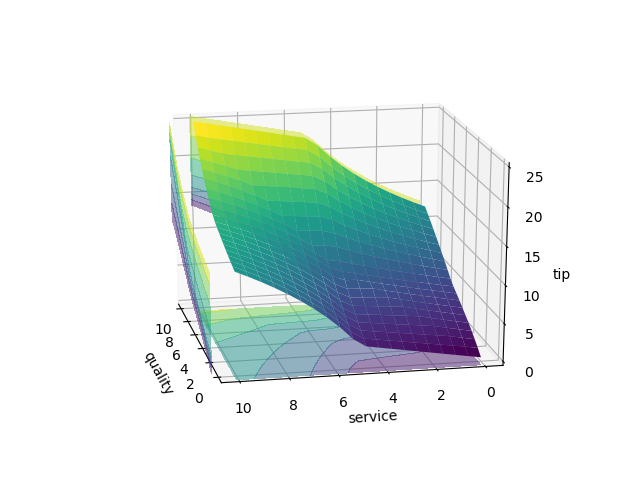

In [17]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

# przygotowanie siatki
sampled = np.linspace(0, 10, 20)
x, y = np.meshgrid(sampled, sampled)
z = np.zeros((len(sampled),len(sampled)))

for i in range(len(sampled)):
    for j in range(len(sampled)):
        inputs = {'quality': x[i, j], 'service': y[i, j]}
        res = sugeno.compute(inputs)
        z[i, j] = res['rb_takagi']
            
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', linewidth=0.4, antialiased=True)
cset = ax.contourf(x, y, z, zdir='z', offset= -1, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset= 11, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset= 11, cmap='viridis', alpha=0.5)
ax.set_xlabel('quality')
ax.set_ylabel('service')
ax.set_zlabel('tip')
ax.view_init(30, 200)

<div style="text-align: right">&copy; Zakład Inteligencji Obliczeniowej, Instytut Informatyki, Politechnika Krakowska </div>